<a href="https://colab.research.google.com/github/stiwari-ds/DL-Simplified-SWOC-S3/blob/phishing-website-detection/Phishing-Website-Detection/Model/00_eda_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
#Utils
import os
import warnings
warnings.filterwarnings(action='ignore')

#Data analysis
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2, mutual_info_classif

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'png'
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

#Reproducibility
SEED = 2311
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

In [2]:
DATA_URL = 'https://raw.githubusercontent.com/stiwari-ds/DL-Simplified-SWOC-S3/phishing-website-detection/Phishing-Website-Detection/Dataset/original/phishing_website_dataset.csv'
data = pd.read_csv(DATA_URL)

# Data overview

In [3]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

**Missing values:**

In [5]:
data.isna().sum().sum()

0

**Column summary:**

In [6]:
data.astype('category').describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,11055,2,3,2,2,2,2,3,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,1,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,1
freq,1,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,9553,9259,6560,5337,4449,8440,9041,9426,9776,9740,10579,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


* Some heavily imbalanced features (e.g. *RightClick* and *Iframe*).  
* index is a unique identifier. 

**Target variable:**

In [7]:
TARGET = 'Result'

In [8]:
data[TARGET].value_counts(normalize=True)

 1    0.5569
-1    0.4431
Name: Result, dtype: float64

Fairly balanced.

# Data cleaning

**Dropping irrelevant columns**

In [9]:
data = data.drop('index', axis=1)  #index is the unique identifier

In [10]:
data.shape

(11055, 31)

**Fixing column names**

In [11]:
column_name_mapping = {
    'having_IPhaving_IP_Address': 'having_IP_address',
    'URLURL_Length': 'URL_length',
    'Shortining_Service': 'URL_shortening_service',
    'having_Sub_Domain': 'having_subdomain',
    'SSLfinal_State': 'SSL_final_state',
    'Domain_registeration_length': 'domain_registration_length',
    'RightClick': 'right_click',
    'popUpWidnow': 'popup_window',
    'DNSRecord': 'DNS_record'
}

In [12]:
data.rename(columns=column_name_mapping, inplace=True)
data.rename(str.lower, axis=1, inplace=True)

In [13]:
data.columns

Index(['having_ip_address', 'url_length', 'url_shortening_service',
       'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
       'having_subdomain', 'ssl_final_state', 'domain_registration_length',
       'favicon', 'port', 'https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'on_mouseover', 'right_click', 'popup_window', 'iframe',
       'age_of_domain', 'dns_record', 'web_traffic', 'page_rank',
       'google_index', 'links_pointing_to_page', 'statistical_report',
       'result'],
      dtype='object')

In [14]:
TARGET = 'result'

**Encoding target values**

In [15]:
data[TARGET].replace({-1: 0}, inplace=True)

In [16]:
data[TARGET].value_counts(normalize=True)

1    0.5569
0    0.4431
Name: result, dtype: float64

**Saving processed data**

In [17]:
data.to_csv('phishing_website_dataset_cleaned.csv', index=False)

# Feature selection

In [18]:
features = [f for f in data.columns if f != TARGET]

### Correlation

In [19]:
def plot_corr_matrix(corr_df, file_name, size=18):
    plt.figure(figsize=(size, size * 0.75))
    sns.heatmap(
        corr_df,
        mask=np.triu(np.ones_like(corr_df)),
        vmin=-1, vmax=1, center=0, 
        annot=True, annot_kws={'fontsize':8},
        fmt='.2f', linewidths=0.1
    )
    plt.savefig(f'{file_name}.png', bbox_inches='tight')
    plt.show()

**Pearson correlation**

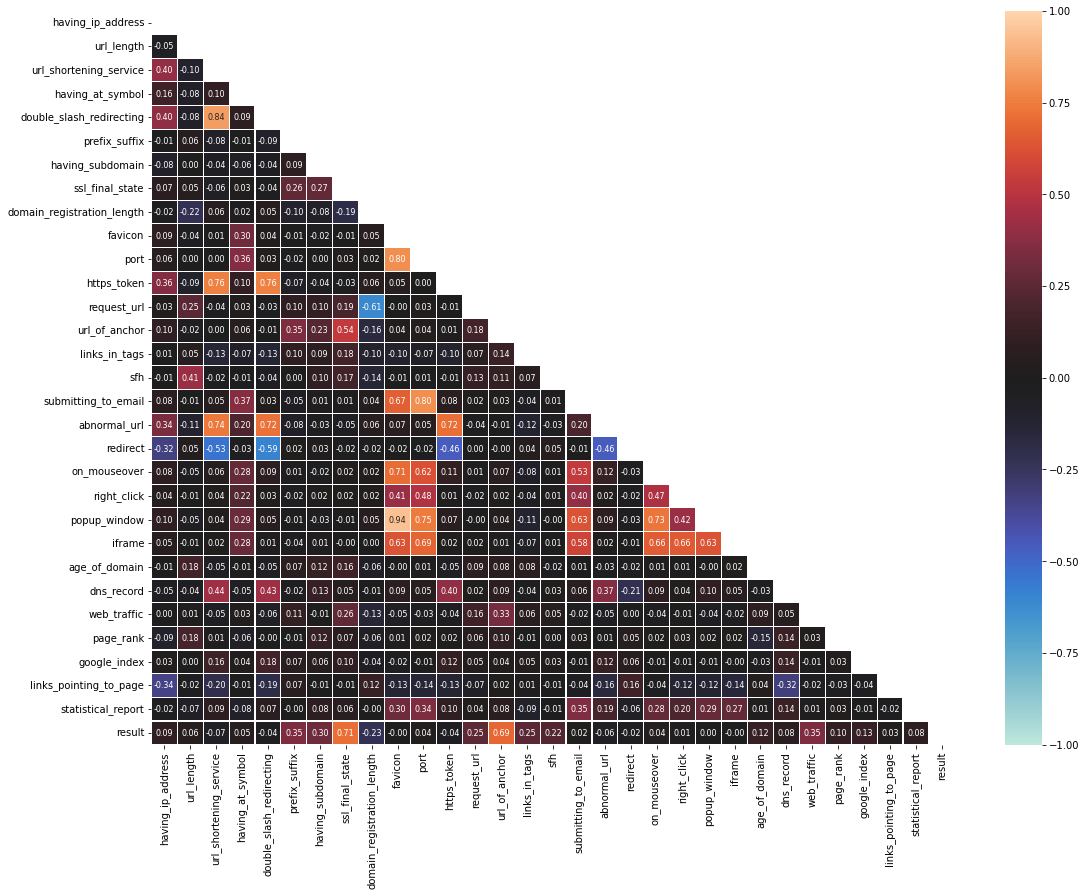

In [20]:
plot_corr_matrix(data.corr(method='pearson'), 'pearson-correlation')

**Kendall-Tau correlation**

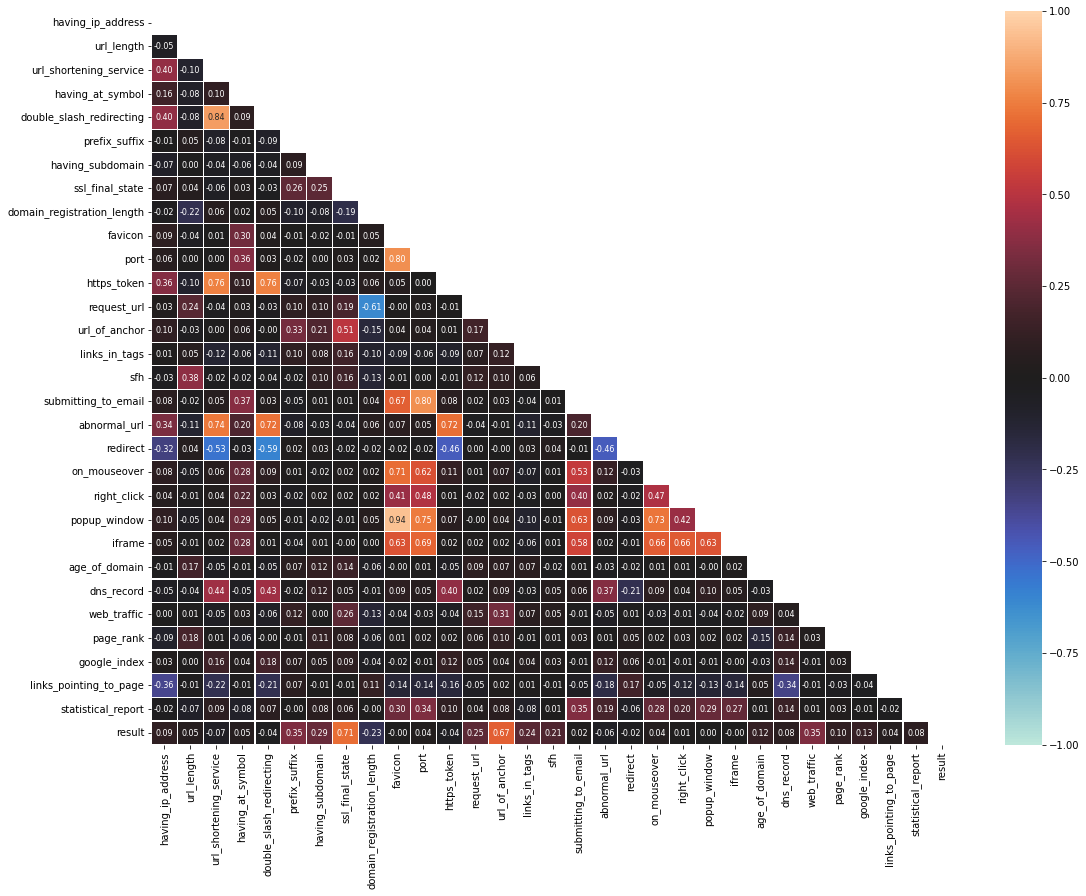

In [21]:
plot_corr_matrix(data.corr(method='kendall'), 'kendalltau-correlation')

**Spearman-rank correlation**

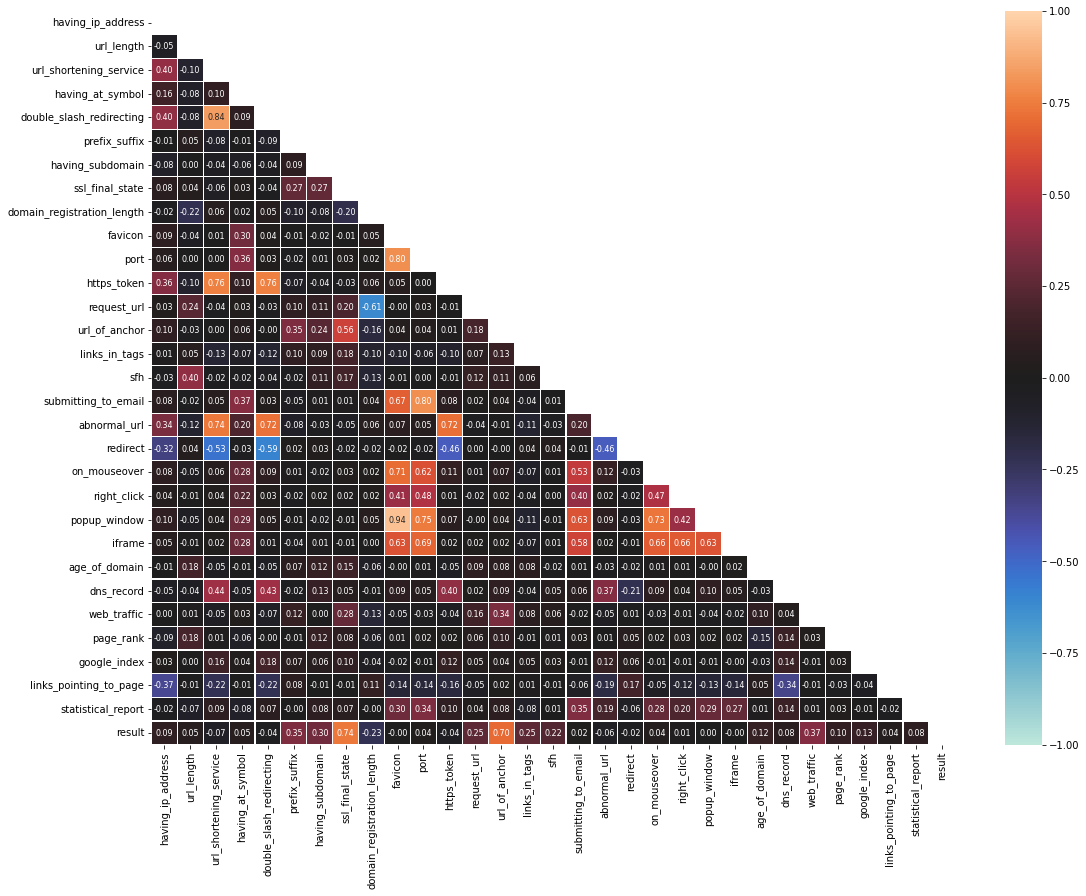

In [22]:
plot_corr_matrix(data.corr(method='spearman'), 'spearmanrank-correlation')

### Chi-square test of independence

In [23]:
temp = data + 1 #sklearn chi-square implementation requires all positive values

chi2_test = chi2(temp[features], temp[TARGET])

pd.DataFrame(
    data={
        'chi2-statistic': chi2_test[0], 
        'p-value': chi2_test[1],
        'accepted?': chi2_test[1] < 0.05
    },
    index=features
)

,chi2-statistic,p-value,accepted?
having_ip_address,6.7258e+01,2.3815e-16,True
url_length,5.8334e+01,2.2114e-14,True
url_shortening_service,1.3341e+01,2.5970e-04,True
having_at_symbol,9.2795e+00,2.3174e-03,True
double_slash_redirecting,4.2600e+00,3.9020e-02,True
prefix_suffix,2.3309e+03,0.0000e+00,True
having_subdomain,6.1797e+02,2.0684e-136,True
ssl_final_state,3.7538e+03,0.0000e+00,True
domain_registration_length,7.5340e+02,7.3301e-166,True
favicon,3.2082e-04,9.8571e-01,False


### Mutual Information score

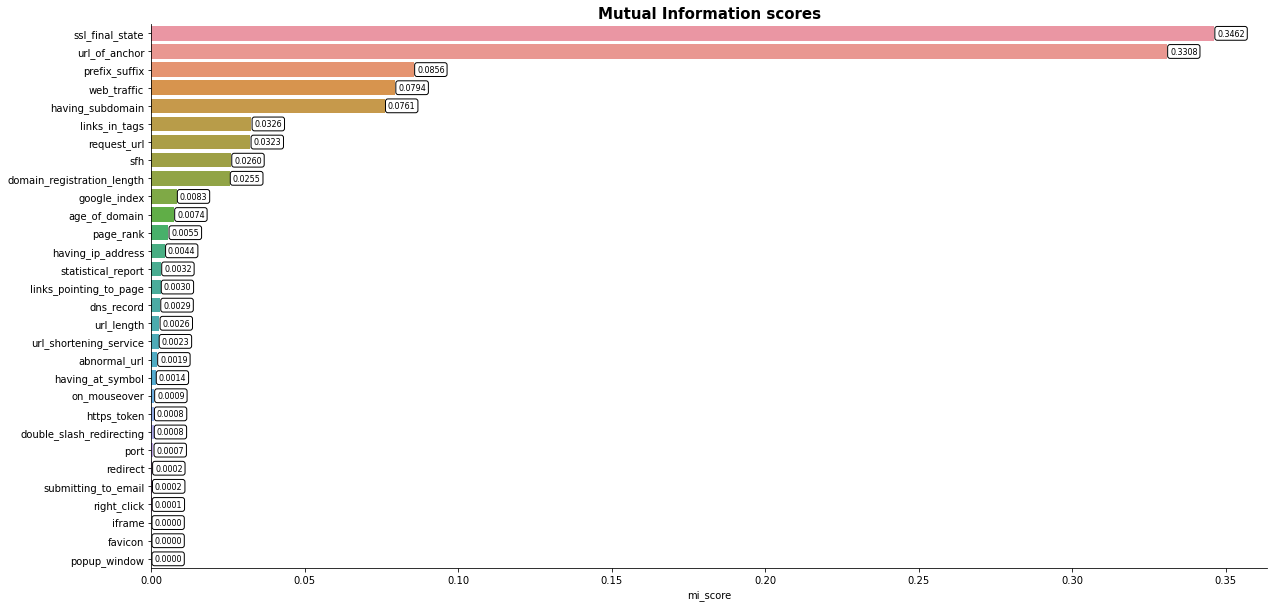

In [24]:
cat_mask = [True] * len(features) #boolean mask for discrete features

mi_scores = mutual_info_classif(data[features], data[TARGET], 
                                discrete_features=cat_mask, 
                                random_state=SEED)
mi_df = pd.DataFrame(
    data={'mi_score': mi_scores}, 
    index=features
).sort_values(by='mi_score', ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.set_title('Mutual Information scores', fontweight='bold', fontsize=15)
sns.barplot(x=mi_df.mi_score, y=mi_df.index, ax=ax)
for patch in ax.patches:
    y, height, width = patch.get_y(), patch.get_height(), patch.get_width()
    ax.text(width+0.001, y + height/2, f'{width:.4f}', 
            va='center', ha='left', size=8, 
            bbox={'facecolor': 'white', 'boxstyle': 'round'})

plt.savefig('mutual-information-scores.png', bbox_inches='tight')
plt.show()

### Feature sets

In [25]:
reduced_features = [
    f for f in features if f not in 
    ('favicon', 'submitting_to_email', 'redirect', 'right_click',
    'popup_window', 'iframe', 'links_pointing_to_page')
]

top_features = [
    'ssl_final_state', 'url_of_anchor', 'prefix_suffix', 
    'web_traffic', 'having_subdomain', 'links_in_tags', 
    'request_url', 'sfh', 'domain_registration_length'
]

In [26]:
len(features), len(reduced_features), len(top_features)

(30, 23, 9)

Reducing the dimensions will speed up the modeling process. But there may be a loss in performance in terms of accuracy.  
We must see the results and decide on the trade-off.